In [27]:
import pandas as pd
import numpy as np
from collections import defaultdict 
import sys
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tabulate import tabulate

In [24]:
ADDR = '/nfs_home/nbhardwaj/data/rds_final/'
RES_ADDR = '/nfs_home/nbhardwaj/results/baseline_RD/'

- for a given address, we predict the same RD value as the last time

In [25]:
files = [510
         , 511, 526, 600, 602, 620, 623, 625, 631, 641, 648, 657  
        ]

sets = [x for x in range(64)]
# sets = [0]

In [ ]:
# too slow 22m for 300M file

# acc = []
# len_ = []
# for fname in files:
#     for cset in sets:
#         df = pd.read_csv(ADDR+str(fname)+'_'+str(cset)+'.csv', index_col = [0], usecols = [0,2,3])
#         m = {}
#         f, nf = 0, 0
#         for i in range(len(df)):
#             inst = df.iloc[i, 0]
#             data = df.iloc[i, 1] 
#             if(inst in m.keys() and m[inst]==data):
#                 f+=1
#             else:
#                 nf+=1
#                 m[inst] = data
#         print("___>", cset, fname, f/(f+nf))
#         acc.append(f*100/(f+nf))
#         len_.append(len(df))
        
#     print("done for file->", fname)
#     df = pd.DataFrame(list(zip(acc, len_)), columns = ['accuracy', 'length'])
#     df.to_csv(RES_ADDR+'base_next.csv')

In [ ]:
m = {}
for fname in files:
    acc = []
    len_ = []
    for cset in sets:
        df = pd.read_csv(ADDR+str(fname)+'_'+str(cset)+'.csv', index_col = [0], usecols = [0,3,8])
        df = df.sort_values(by = 'Data', kind = 'mergesort')
        tots = len(df)
        pos = len(df[df.label == df.label.shift(periods =1)])
        print("___>", cset, fname, pos/tots)
        acc.append(pos*100/tots)
        len_.append(tots)
    m[fname] = np.dot(acc, len_)/np.sum(len_)
    print("done for file->", fname)
print("all doneXXX")

In [28]:
print(m)

{}


In [ ]:
np.save(RES_ADDR+'addr_RD_baseline.npy', m)

In [29]:
m = np.load(RES_ADDR+'addr_RD_baseline.npy', allow_pickle = True).item()
print(m)

{641: 87.77553567775553, 657: 80.41510709080387, 648: 89.71508122563274, 620: 70.89914954370671, 526: 83.63487204435636, 623: 78.53198288123359, 625: 94.22659326565504, 631: 84.59585927821486, 600: 74.83948946569507, 602: 79.96710842454911, 510: 77.47287102924612, 511: 80.25161316477254}


In [31]:
from collections import OrderedDict
m = OrderedDict((sorted(m.items())))

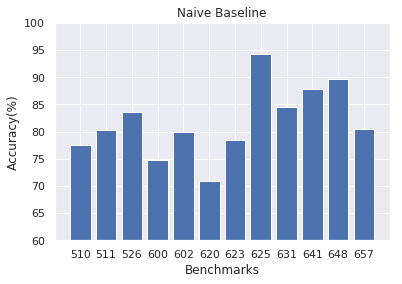

In [36]:
import seaborn as sns
sns.set()
plt.bar(range(len(m)), list(m.values()), align = 'center')
plt.xticks(range(len(m)), list(m.keys()))
plt.ylim((60, 100))
plt.xlabel('Benchmarks')
plt.ylabel('Accuracy(%)')
plt.title('Naive Baseline')
plt.show()



In [17]:
# np.save(RES_ADDR+'baseline_RD_acc.npy', m)
# np.save(RES_ADDR+'unique_inst.npy', m_inst)
# print(m)
# print(m_inst)

In [37]:
# m = np.load(RES_ADDR+'basic_next.npy', allow_pickle = True).item()
# print(m)

{641: 97.48103195534459, 657: 93.48021202751076, 648: 99.99947895342746, 620: 80.78997939155008, 526: 86.02273457042128, 623: 97.13850539228334, 625: 92.78825277694624, 631: 97.043130945078, 600: 98.18742323669089, 602: 87.63799835793077, 510: 89.23382985472584, 511: 96.48587043492564}


In [15]:
# df.Instruction.unique()

array([        4247723,         4247737,         4248195,         4248232,
               4248240,         4784699,         4789742,         4789756,
               4789961,         4790034,         4790222,         5048593,
               5048605,         5048609,         5262102,         5262109,
               5262116,         5262155,         5262159,         5262163,
               7842193,         7842240,         7842265,         7842271,
               7842290,         7842298,         8600999,         8601059,
               8601072,         8601080,         8601112,         8601122,
               8601127,         8601138,         8601148,         8601216,
               8601229,         8601256,         8601266,         8601271,
               8601282,         8601295,         8601308,         8601314,
               8601320,         8668207,         8668221,         8668244,
               8668251,         8668256,         8668295,         8668427,
               8668431,  

In [38]:
# for x in m.keys():
#     print(x, "\t", m[x])

641 	 97.48103195534459
657 	 93.48021202751076
648 	 99.99947895342746
620 	 80.78997939155008
526 	 86.02273457042128
623 	 97.13850539228334
625 	 92.78825277694624
631 	 97.043130945078
600 	 98.18742323669089
602 	 87.63799835793077
510 	 89.23382985472584
511 	 96.48587043492564
